<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/KDH_RNN_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [92]:
# 2. Đọc file csv
df = pd.read_csv('KDH-Data.csv')
df

,Date,Price
0,2017-01-03,9198.4
1,2017-01-04,9198.4
2,2017-01-05,8944.8
3,2017-01-06,9083.2
4,2017-01-07,9106.2
...,...,...
2702,2024-05-28,36250.0
2703,2024-05-29,35700.0
2704,2024-05-30,36050.0
2705,2024-05-31,36200.0


In [93]:
df1=df.reset_index()['Price']

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [95]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [96]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [97]:
test_data

array([[0.43569166],
       [0.43037441],
       [0.43314782],
       [0.43314782],
       [0.38565793],
       [0.38460385],
       [0.38673544],
       [0.39097519],
       [0.37607751],
       [0.38480998],
       [0.38480998],
       [0.35904823],
       [0.33988738],
       [0.32496627],
       [0.3622339 ],
       [0.34946781],
       [0.34712072],
       [0.34712072],
       [0.31538584],
       [0.35159939],
       [0.36649708],
       [0.38565793],
       [0.35478506],
       [0.35478506],
       [0.35478506],
       [0.38326868],
       [0.38673544],
       [0.38352635],
       [0.38034068],
       [0.38247227],
       [0.38326868],
       [0.38326868],
       [0.38565793],
       [0.38460385],
       [0.3888436 ],
       [0.36117982],
       [0.3483903 ],
       [0.3737351 ],
       [0.3737351 ],
       [0.35159939],
       [0.36117982],
       [0.38247227],
       [0.37820909],
       [0.36836514],
       [0.36836514],
       [0.36836514],
       [0.37926317],
       [0.379

In [98]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [99]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [100]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [101]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [102]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
33/33 [==============================] - 2s 29ms/step - loss: 0.0044 - val_loss: 5.8806e-04
Epoch 2/100
33/33 [==============================] - 1s 33ms/step - loss: 4.6863e-04 - val_loss: 4.3310e-04
Epoch 3/100
33/33 [==============================] - 1s 42ms/step - loss: 3.5878e-04 - val_loss: 4.1761e-04
Epoch 4/100
33/33 [==============================] - 1s 41ms/step - loss: 3.4838e-04 - val_loss: 3.5342e-04
Epoch 5/100
33/33 [==============================] - 1s 28ms/step - loss: 3.2126e-04 - val_loss: 3.4336e-04
Epoch 6/100
33/33 [==============================] - 1s 22ms/step - loss: 3.0564e-04 - val_loss: 4.6485e-04
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 3.0376e-04 - val_loss: 4.4544e-04
Epoch 8/100
33/33 [==============================] - 1s 21ms/step - loss: 2.9154e-04 - val_loss: 3.9725e-04
Epoch 9/100
33/33 [==============================] - 1s 20ms/step - loss: 2.6325e-04 - val_loss: 3.5566e-04
Epoch 10/100
33/33 [============

In [103]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


In [104]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

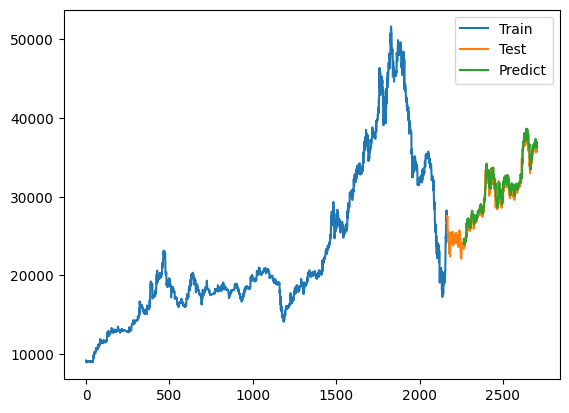

In [105]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [106]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [107]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 697.0829583971366
MAE: 558.3729927201704
MAPE: 0.0181646367573756


In [108]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 24ms/step


In [109]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 23ms/step


In [110]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 34ms/step


In [111]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[36463.79833145],
       [36896.51159821],
       [37233.71099167],
       [37557.62760544],
       [37783.78855877],
       [38236.63465176],
       [38654.32209206],
       [38879.87997665],
       [39173.57699432],
       [39594.49606876],
       [40089.11675835],
       [40423.24228249],
       [40813.47610016],
       [41131.51979141],
       [41674.83891735],
       [42080.71944237],
       [42494.48057442],
       [42897.64856243],
       [43399.28215256],
       [43842.65981197],
       [44226.46853027],
       [44611.50628738],
       [45077.87180729],
       [45489.86699123],
       [45832.34641685],
       [46202.5695488 ],
       [46561.78476791],
       [46961.24273815],
       [47335.73060932],
       [47666.21227512]])

In [112]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


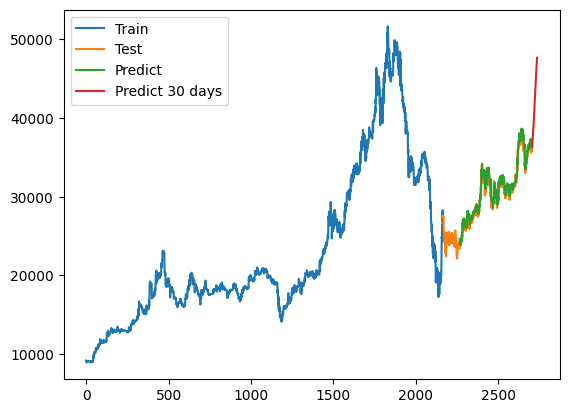

In [113]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



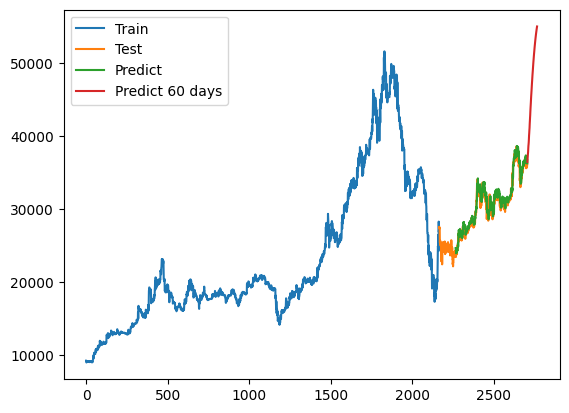

In [114]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



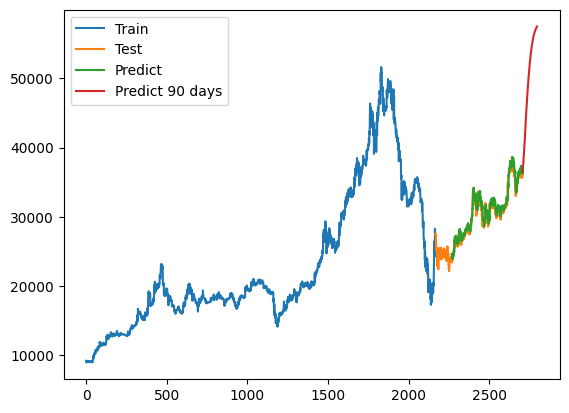

In [115]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

